In [1]:
#Project - Travel Destinations based on Attractions 

# Project aim/description:
# The goal of this project is to identify the type of attraction each city offers based on data
# from the Worldwide Travel Cities database. While the dataset includes various features, this
# analysis focuses on the rankings of each city across nine key attributes: culture, adventure,
# nature, beaches, nightlife, cuisine, wellness, urban, and seclusion. Using K-Means
# clustering, cities are grouped based on similarities in these rankings. The results are then
# visualized using a heatmap to better understand the characteristics of each cluster.

In [2]:
import math
import pickle
import gzip
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import pytest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

                                     id            city    country  \
0  c54acf38-3029-496b-8c7a-8343ad82785c           Milan      Italy   
1  0bd12654-ed64-424e-a044-7bc574bcf078  Yasawa Islands       Fiji   
2  73036cda-9134-46fc-a2c6-807782d59dfb        Whistler     Canada   
3  3872c9c0-6b6e-49e1-9743-f46bfe591b86      Guanajuato     Mexico   
4  e1ebc1b6-8798-422d-847a-22016faff3fd        Surabaya  Indonesia   

          region                                  short_description  \
0         europe  Chic streets lined with fashion boutiques, his...   
1        oceania  Crystal-clear waters, secluded beaches, and vi...   
2  north_america  Snow-capped peaks and lush forests create a se...   
3  north_america  Winding cobblestone streets and colorful facad...   
4           asia  Bustling streets filled with the aroma of loca...   

    latitude   longitude                                   avg_temp_monthly  \
0  45.464194    9.189635  {"1":{"avg":3.7,"max":7.8,"min":0.4},"2":{"avg.

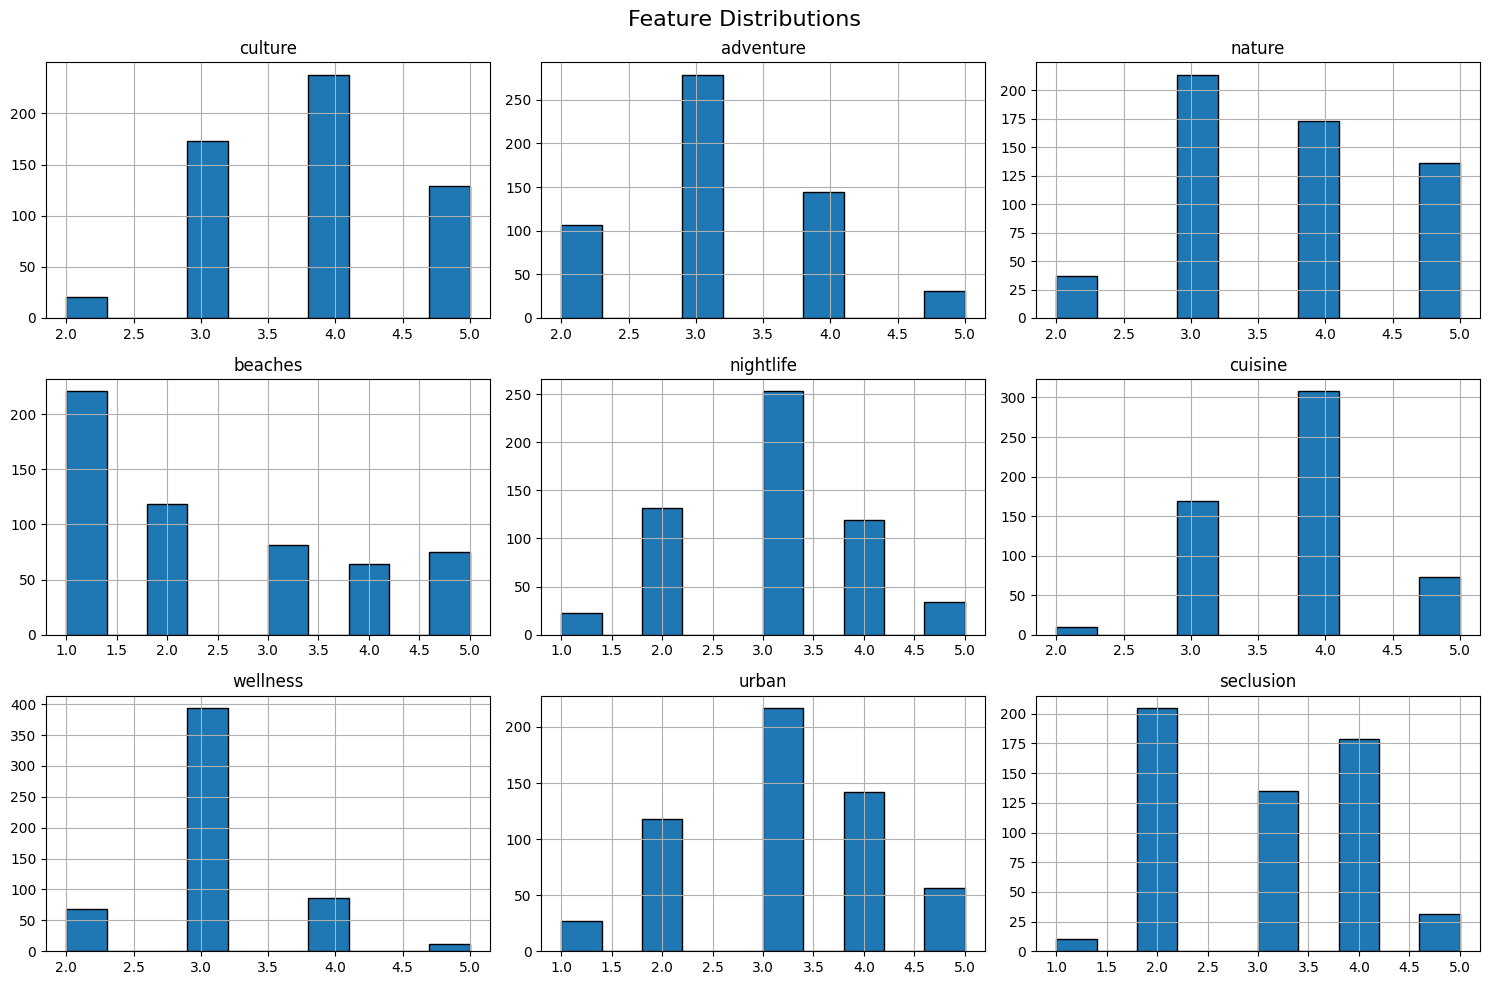

In [3]:
#load in data 
data = pd.read_csv(r'C:\Users\17202\Downloads\CU Boulder MSCS 2024\Unsupervised Algorithms in Machine Learning\Week 5\Worldwide Travel Cities Dataset.csv')
print(data.head())

#Cleam up data 
data = data.drop(columns=['id', 'latitude', 'longitude'], errors='ignore')
data = data.dropna()


#Pick out numeric features to use 
features = [
    "culture", "adventure", "nature", "beaches",
    "nightlife", "cuisine", "wellness", "urban", "seclusion"
]

#Visualize data 
data[features].hist(bins=10, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
#Model building 

#Scale data properly 
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

# Initialize centroids randomly 
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), size=k, replace=False)
    return X[indices]

# Assign clusters
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = euclidean_distance(point, centroids)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Update centroids 
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        points = X[clusters == i]
        if len(points) > 0:
            new_centroids.append(points.mean(axis=0))
        else:
            # Reinitialize empty cluster
            new_centroids.append(X[np.random.choice(len(X))])
    return np.array(new_centroids)

# Main K-Means function 
def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, clusters

                 city    country  cluster
553      Viña del Mar      Chile        0
1      Yasawa Islands       Fiji        0
550          Savusavu       Fiji        0
549  Vancouver Island     Canada        0
38         Raja Ampat  Indonesia        0
..                ...        ...      ...
22          Reykjavik    Iceland        2
25              Kyoto      Japan        2
518           Ha Long    Vietnam        2
519            Manaus     Brazil        2
552         Rovaniemi    Finland        2

[560 rows x 3 columns]
          culture  adventure    nature   beaches  nightlife   cuisine  \
cluster                                                                 
0        3.250000   3.600000  4.264286  4.428571   3.035714  3.735714   
1        4.295880   2.692884  3.056180  1.737828   3.483146  4.131086   
2        3.620915   3.640523  4.411765  1.627451   2.196078  3.254902   

         wellness     urban  seclusion  
cluster                                 
0        3.357143  2.621

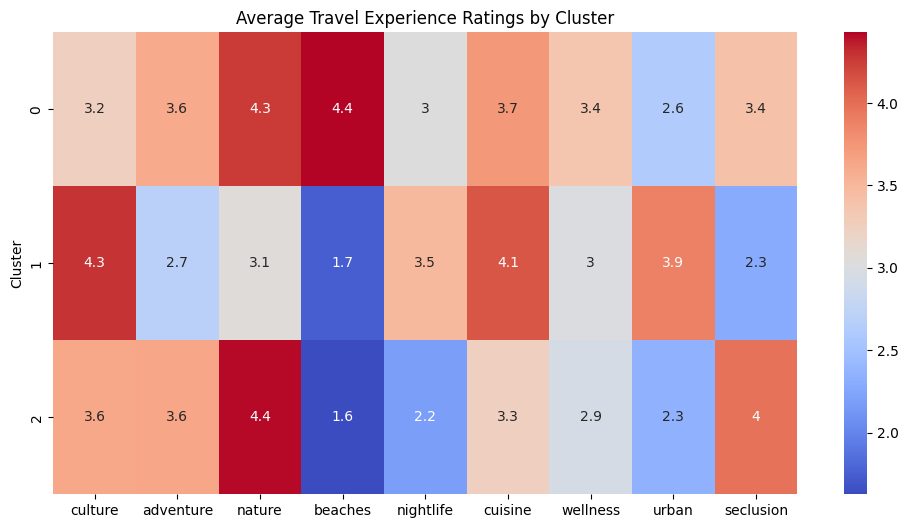

In [5]:
# Run K-Means

X = data[features].values
k = 3
centroids, clusters = k_means(X, k)
data['cluster'] = clusters

# View clustering result
print(data[['city', 'country', 'cluster']].sort_values(by='cluster'))

# Heatmap for better interpretation of data 
cluster_averages = data.groupby('cluster')[features].mean()
print(cluster_averages)

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_averages, cmap='coolwarm', annot=True)
plt.title('Average Travel Experience Ratings by Cluster')
plt.ylabel('Cluster')
plt.show()

                 city      country  cluster
556        Gothenburg       Sweden        0
553      Viña del Mar        Chile        0
7            Kingston      Jamaica        0
57          Barcelona        Spain        0
47            Cotonou        Benin        0
..                ...          ...      ...
550          Savusavu         Fiji        3
549  Vancouver Island       Canada        3
1      Yasawa Islands         Fiji        3
547    Bay of Islands  New Zealand        3
546   Kangaroo Island    Australia        3

[560 rows x 3 columns]
          culture  adventure    nature   beaches  nightlife   cuisine  \
cluster                                                                 
0        3.793478   3.271739  3.532609  3.923913   3.750000  4.173913   
1        3.746914   3.524691  4.302469  1.518519   2.290123  3.333333   
2        4.326923   2.600962  2.975962  1.456731   3.500000  4.115385   
3        3.061224   3.744898  4.561224  4.316327   2.520408  3.510204   

         

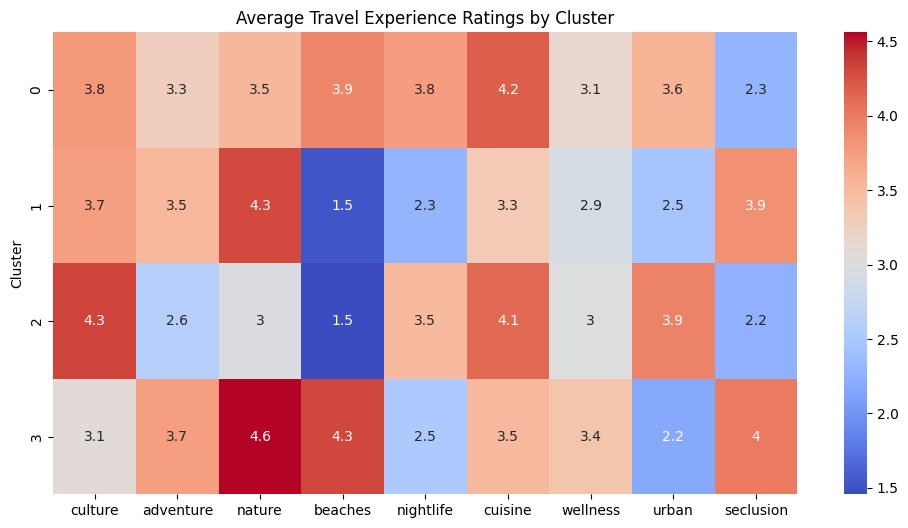

In [6]:
X = data[features].values
k = 4
centroids, clusters = k_means(X, k)
data['cluster'] = clusters

# View clustering result
print(data[['city', 'country', 'cluster']].sort_values(by='cluster'))

#Heatmap for better interpretation of data 
cluster_averages = data.groupby('cluster')[features].mean()
print(cluster_averages)

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_averages, cmap='coolwarm', annot=True)
plt.title('Average Travel Experience Ratings by Cluster')
plt.ylabel('Cluster')
plt.show()

In [7]:
# Result discussion 

# After experimenting with different values for the number of clusters (K), using K = 3 produced the most meaningful and interpretable results.
# Analysis of heatmap: 

# - Cluster 0 features cities that are highly ranked for beaches, nature, and cuisine,
#   making them attractive to beachgoers who also enjoy scenic environments and diverse food options.

# - Cluster 1 includes cities with strong scores in culture, cuisine, and urban appeal,
#   indicating destinations well-suited for travelers interested in rich cultural experiences and vibrant city life.

# - Cluster 2 contains cities that rank high in nature, adventure, and seclusion,
#   suggesting they are ideal for outdoor-oriented travelers seeking remote or rural experiences.

# Conclusion: Overall, the clusters successfully differentiate cities into categories that align with 
# distinct travel preferences: rural adventurers, urban culture seekers, and beach lovers.
